In [1]:
from dateutil import parser
from datetime import datetime
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline


with open('turnstiles_full.pickle', 'rb') as file:
    mta = pickle.load(file)
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,REGULAR,7089463,2401758,2019-06-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,04:00:00,REGULAR,7089491,2401764,2019-06-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,08:00:00,REGULAR,7089511,2401807,2019-06-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,12:00:00,REGULAR,7089598,2401889,2019-06-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,16:00:00,REGULAR,7089801,2401946,2019-06-08 16:00:00


In [2]:
with open('turnstiles_by_day.pickle', 'rb') as file:
    by_day = pickle.load(file)
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,7027457,2382455,2019-04-20,7026702.0,2382234.0,Saturday,755.0,221.0
2,A002,R051,02-00-00,59 ST,7028053,2382642,2019-04-21,7027457.0,2382455.0,Sunday,596.0,187.0
3,A002,R051,02-00-00,59 ST,7029313,2383025,2019-04-22,7028053.0,2382642.0,Monday,1260.0,383.0
4,A002,R051,02-00-00,59 ST,7030821,2383462,2019-04-23,7029313.0,2383025.0,Tuesday,1508.0,437.0
5,A002,R051,02-00-00,59 ST,7032351,2383896,2019-04-24,7030821.0,2383462.0,Wednesday,1530.0,434.0


In [3]:
#create column for sum of daily entries and exits

by_day['total_traffic'] = by_day['daily_entries'] + by_day['daily_exits']
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits,total_traffic
1,A002,R051,02-00-00,59 ST,7027457,2382455,2019-04-20,7026702.0,2382234.0,Saturday,755.0,221.0,976.0
2,A002,R051,02-00-00,59 ST,7028053,2382642,2019-04-21,7027457.0,2382455.0,Sunday,596.0,187.0,783.0
3,A002,R051,02-00-00,59 ST,7029313,2383025,2019-04-22,7028053.0,2382642.0,Monday,1260.0,383.0,1643.0
4,A002,R051,02-00-00,59 ST,7030821,2383462,2019-04-23,7029313.0,2383025.0,Tuesday,1508.0,437.0,1945.0
5,A002,R051,02-00-00,59 ST,7032351,2383896,2019-04-24,7030821.0,2383462.0,Wednesday,1530.0,434.0,1964.0


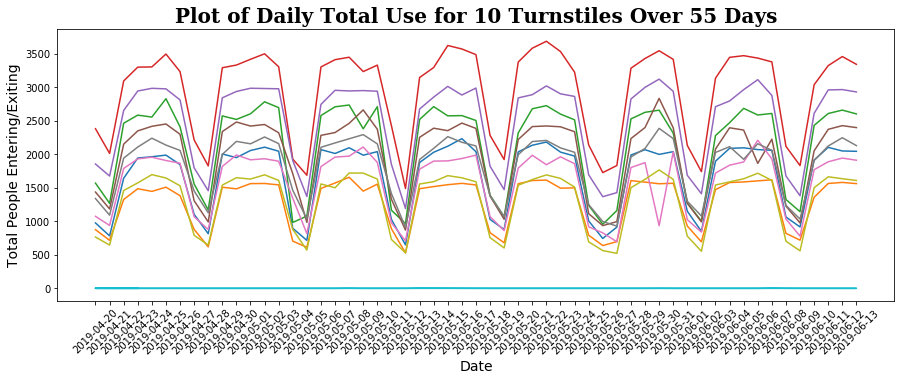

In [17]:
num_days = len(by_day.DATE.unique())
num_turnstiles = 10

plt.figure(figsize=(15,5))
for i, _ in by_day.reset_index().iloc[0:(num_days*num_turnstiles):num_days].iterrows():
    plt.plot(by_day.DATE.iloc[i:(i+num_days)], by_day.total_traffic.iloc[i:(i+num_days)])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use for {} Turnstiles Over {} Days'.format(num_turnstiles, num_days), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = by_day.DATE.iloc[0:num_days]
plt.xticks(ticks_x, rotation = 45)

plt.savefig('Daily_Traffic_Turnstiles.png', dpi = 1000)
plt.show()
plt.close()

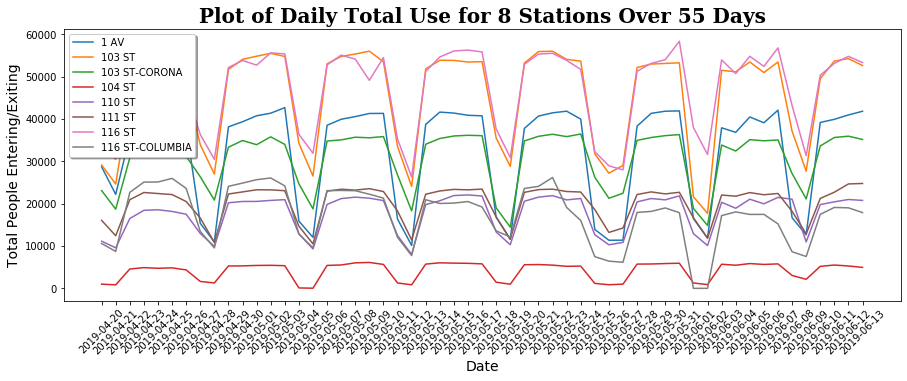

In [20]:
by_station_day = by_day.groupby(['STATION', 'DATE', 'weekday'], as_index = False).sum()
num_stations = 8

plt.figure(figsize=(15,5))
for i, _ in by_station_day.reset_index().iloc[0:(num_days*num_stations):num_days].iterrows():
    plt.plot(by_station_day.DATE.iloc[i:(i+num_days)], 
             by_station_day.total_traffic.iloc[i:(i+num_days)])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use for {} Stations Over {} Days'.format(num_stations, num_days), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = by_station_day.DATE.iloc[0:num_days]
plt.xticks(ticks_x, rotation = 45)
plt.legend(by_station_day.iloc[0:(num_days*num_stations):num_days, 0], shadow = True)

plt.savefig('Daily_Traffic_Stations.png', dpi = 1000)
plt.show()
plt.close()

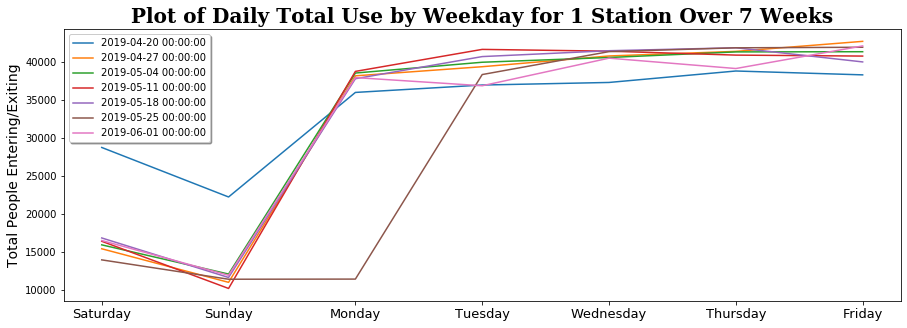

In [21]:
num_weeks = 7

plt.figure(figsize=(15,5))
for i, _ in by_station_day.reset_index().iloc[0:(7*num_weeks):7].iterrows():
    plt.plot(by_station_day.weekday.iloc[i:(i+7)], by_station_day.total_traffic.iloc[i:(i+7)])
plt.ylabel('Total People Entering/Exiting', fontsize = 14)
plt.title('Plot of Daily Total Use by Weekday for 1 Station Over {} Weeks'.format(num_weeks), 
          family = 'Serif', fontsize = 20, weight = 'bold')
ticks_x = by_station_day.weekday.iloc[0:7]
plt.xticks(ticks_x, fontsize = 13)
plt.legend(by_station_day.iloc[0:num_days:7].DATE, shadow = True)

plt.savefig('Weekdays_1_Station.png', dpi = 1000)
plt.show()
plt.close()

In [5]:
#Get total entry and exit traffic for each station
station_total = by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
pd.options.display.float_format = '{:,.0f}'.format
station_total.head(20)

,STATION,total_traffic
61,34 ST-PENN STA,"15,308,823"
232,GRD CNTRL-42 ST,"12,880,149"
59,34 ST-HERALD SQ,"10,874,560"
14,14 ST-UNION SQ,"9,625,476"
352,TIMES SQ-42 ST,"9,468,584"
46,23 ST,"9,135,850"
225,FULTON ST,"8,360,167"
68,42 ST-PORT AUTH,"8,323,960"
110,86 ST,"7,606,546"
9,125 ST,"6,712,682"


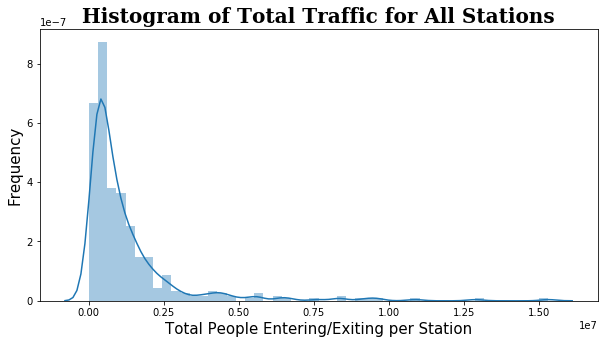

In [24]:
#Distribution and KDE of total traffic per station
plt.figure(figsize = (10, 5))
sns.distplot(station_total['total_traffic'])
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Total People Entering/Exiting per Station', fontsize = 15)
plt.title('Histogram of Total Traffic for All Stations', 
          family = 'Serif', fontsize = 20, weight = 'bold')

plt.savefig('Hist_Total_Traffic.png', dpi = 1000)
plt.show()
plt.close()

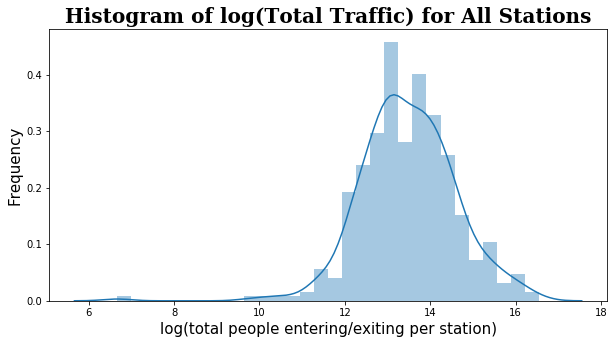

In [13]:
#with log scale
plt.figure(figsize = (10, 5))
sns.distplot(np.log(station_total.total_traffic), 30)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('log(total people entering/exiting per station)', fontsize = 15)
plt.title('Histogram of log(Total Traffic) for All Stations', 
          family = 'Serif', fontsize = 20, weight = 'bold')

plt.savefig('Hist_log_Total_Traffic.png', dpi = 1000)
plt.show()
plt.close()

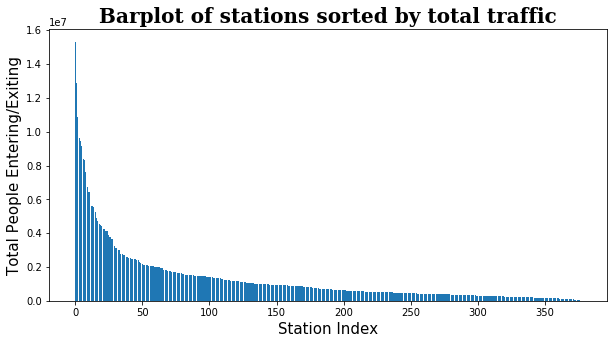

In [23]:
station_total = station_total.reset_index()

plt.figure(figsize = (10, 5))
plt.bar(station_total.index, station_total.total_traffic)
plt.ylabel('Total People Entering/Exiting', fontsize = 15)
plt.xlabel('Station Index', fontsize = 15)
plt.title('Barplot of stations sorted by total traffic', 
          family = 'Serif', fontsize = 20, weight = 'bold')

plt.savefig('Bar_Busiest_Stations.png', dpi = 1000)
plt.show()
plt.close()

In [28]:
#Get list of stations with most traffic
top_stations = station_total.iloc[:9,:]
list_of_stations = top_stations.STATION.tolist()
print(list_of_stations)

['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ', 'TIMES SQ-42 ST', '23 ST', 'FULTON ST', '42 ST-PORT AUTH', '86 ST']


In [29]:
#Filter down dataframe to include only the stations with most traffic
top_by_day = by_day[by_day['STATION'].isin(list_of_stations)]

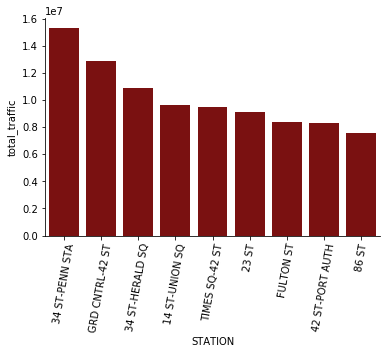

In [34]:
#Get total entry and exit traffic for top stations
top_total = top_by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
bar = sns.barplot(x='STATION', y='total_traffic', data=top_total, color = 'darkred')
bar.set_xticklabels(bar.get_xticklabels(),rotation=80)
sns.despine()

plt.savefig('Bar_Busiest_Stations_2.png', dpi = 1000)
plt.show()
plt.close()